# 7. Hypothesis Tests and Confidence Intervals in Multiple Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Hypothesis Tests for a single Coefficient

Test the hypothesis that a change in the student–teacher
ratio has no effect on test scores, holding constant the percentage of English learners
in the district

In [2]:
df = pd.read_excel("data/replication/Replication Data/caschool.xlsx")
df.head()

F:\miniconda3\envs\py\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [3]:
model = smf.ols('testscr ~ str + el_pct', data =df).fit(cov_type='HC2')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     222.8
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.56e-66
Time:                        14:57:50   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      8.754     78.365      0.0

In [4]:
model.tvalues

Intercept    78.364956
str          -2.536570
el_pct      -20.888079
dtype: float64

In [5]:
model.pvalues

Intercept    0.000000e+00
str          1.119444e-02
el_pct       6.872883e-97
dtype: float64

the null hypothesis can be rejected at the 5% significance level (but not quite at the 1%
significance level).

In [6]:
model.conf_int()

,0,1
Intercept,668.874088,703.190409
str,-1.952248,-0.250343
el_pct,-0.710746,-0.588807


we can be 95% confident that the
true value of the coefficient is between -1.95 and -0.26. 

In [7]:
model.conf_int() *-2

,0,1
Intercept,-1337.748176,-1406.380819
str,3.904497,0.500687
el_pct,1.421493,1.177614


Interval if str decreases by two is (10.52, 3.902)

### Adding expenditures per pupil

If manager is to hire more teachers, she can pay for those teachers either by making cuts elsewhere in the budget (no new computers, reduced maintenance, and so on) or by asking for an increase in her budget, which taxpayers do not
favor. What, she asks, is the effect on test scores of reducing the student–teacher ratio,
holding expenditures per pupil (and the percentage of English learners) constant?

In [8]:
model2 = smf.ols('testscr ~ str + I(expn_stu / 1000) + el_pct', data =df).fit(cov_type='HC2')
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     146.4
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           9.03e-65
Time:                        14:57:50   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            649.5779     15

Expn (in book) is total annual expenditures per pupil in the district in thousands of
dollars unlike the dataset

Holding expenditures per pupil and the percentage of
English learners constant, changing the student–teacher ratio is estimated to have a
very small effect on test scores

In [9]:
model2.tvalues

Intercept             41.839919
str                   -0.592206
I(expn_stu / 1000)     2.432447
el_pct               -20.583253
dtype: float64

In [10]:
model2.pvalues

Intercept             0.000000e+00
str                   5.537124e-01
I(expn_stu / 1000)    1.499718e-02
el_pct                3.877673e-94
dtype: float64

In [11]:
model2.conf_int()

,0,1
Intercept,619.148888,680.007007
str,-1.234265,0.661467
I(expn_stu / 1000),0.751309,6.984495
el_pct,-0.718490,-0.593555


the hypothesis that the population value of
this coefficient is indeed 0 cannot be rejected even at the 10% significance level.
  
The model provides no evidence that hiring more teachers improves test scores if overall expenditures per pupil are held constant

If  the
coefficient on STR in the model were negative and large. If so, school districts could
raise their test scores simply by decreasing funding for other purposes (textbooks, technology, sports, and so on) and using those funds to hire more teachers

Standard error increases in model2 compared to model due to multicollinearity

## Joint Hypotheses

Tax payer asserts that the population values of both
the coefficient on the student–teacher ratio ($\beta_1$) and the coefficient on spending per
pupil ($\beta_2$) are 0; 

In [12]:
constraints = 'str = 0, I(expn_stu / 1000) = 0'

In [13]:
model2.f_test(constraints)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=5.372980036466773, p=0.004967910226898628, df_denom=416, df_num=2>

We can reject the taxpayer’s hypothesis that neither the student–teacher ratio nor expenditures per pupil have an effect
on test scores (holding constant the percentage of English learners)

### The Homoskedasticity-Only F-Statistic

In [14]:
model3 = smf.ols('testscr ~ str + I(expn_stu / 1000) + el_pct', data =df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     107.5
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.60e-51
Time:                        14:57:50   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            649.5779     15

In [15]:
constraints = 'str = 0, I(expn_stu / 1000) = 0'

In [16]:
model3.f_test(constraints)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=8.010126233882449, p=0.0003859745281015147, df_denom=416, df_num=2>

The hypothesis is rejected at the
1% level using the homoskedasticity-only test.

The other method (however tedious) is to do both restricted regression and unrestricted regression and calculate f manuallly

## Testing Single Restrictions Involving Multiple Coefficients


Null Hypothesis 
$ H_0: \beta_1 = \beta_2 $

Alternative Hypothesis
$ H_A: \beta_1 \neq \beta_2 $


In [17]:
constraints = 'str - I(expn_stu / 1000) = 0'

In [18]:
model2.f_test(constraints)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=8.830038052533293, p=0.0031350569277935167, df_denom=416, df_num=1>

reject the null hypothesis

## Confidence Sets for Multiple Coefficients

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_coefficient_confidence_ellipse(model, regressor1, regressor2=None, intercept=0, confidence_level=0.95, xlim=None, ylim=None, xticks=None, yticks=None):
    # Extract coefficients and covariance matrix
    params = model.params
    cov_params = model.cov_params()

    if regressor2 is None:
        # Single regressor case
        regressors = [regressor1]
        se_regressors = [np.sqrt(cov_params.loc[regressor1, regressor1])]
        center = params[regressor1]
        width = 2 * se_regressors[0]

    else:
        # Two regressors case
        regressors = [regressor1, regressor2]
        se_regressors = [np.sqrt(cov_params.loc[regressor1, regressor1]), np.sqrt(cov_params.loc[regressor2, regressor2])]
        center = params[[regressor1, regressor2]].values
        width = 2 * se_regressors[0]
        height = 2 * se_regressors[1]

        # Calculate the covariance between regressor1 and regressor2
        cov_regressor1_regressor2 = cov_params.loc[regressor1, regressor2]

    # Plotting
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Confidence level
    n_std = np.sqrt(-2 * np.log(1 - confidence_level))  # Number of standard deviations

    if regressor2 is None:
        # Single regressor case
        ellipse = Ellipse(xy=(center, intercept), width=n_std * width, height=n_std * width,
                          angle=0, edgecolor='r', fc='None', lw=2)

        ax.add_patch(ellipse)
        ax.scatter(params[regressor1], intercept, marker='o', color='r')  # Center point

        # Labels and title
        ax.set_xlabel(r'$\beta$ ({})'.format(regressor1))
        ax.set_ylabel(r'Intercept ($\beta_0$)')
        ax.set_title('Confidence Ellipse of Coefficient')

    else:
        # Two regressors case
        ellipse = Ellipse(xy=center, width=n_std * width, height=n_std * height,
                          angle=np.degrees(np.arctan(2 * cov_regressor1_regressor2 / (se_regressors[0]**2 - se_regressors[1]**2)) / 2),
                          edgecolor='r', fc='None', lw=2)

        ax.add_patch(ellipse)
        ax.scatter(params[regressor1], params[regressor2], marker='o', color='r')  # Center point

        # Labels and title
        ax.set_xlabel(r'$\beta_1$ ({})'.format(regressor1))
        ax.set_ylabel(r'$\beta_2$ ({})'.format(regressor2))
        ax.set_title('Confidence Ellipse of Coefficients')

    # Set x-axis and y-axis limits if provided
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

     # Set x-axis and y-axis limits if provided
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

    # Set xticks and yticks if provided
    if xticks is not None:
        ax.set_xticks(xticks)
        plt.xticks(rotation=90)
    if yticks is not None:
        ax.set_yticks(yticks)

    plt.grid(True)
    plt.show()


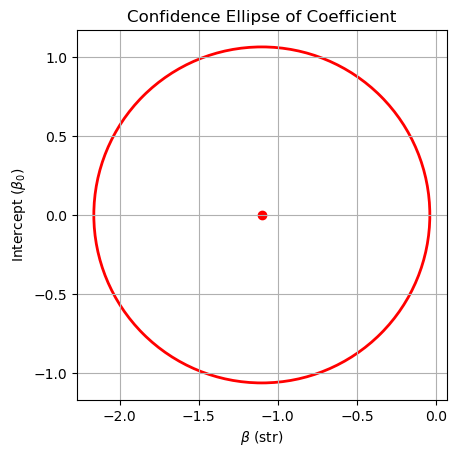

In [20]:
 plot_coefficient_confidence_ellipse(model, 'str')

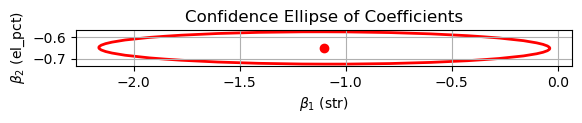

In [21]:
 plot_coefficient_confidence_ellipse(model, 'str','el_pct')

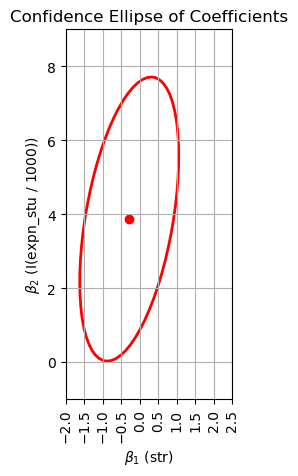

In [22]:
 plot_coefficient_confidence_ellipse(model2, 'str','I(expn_stu / 1000)',
                                     xlim = (-2,1.5), ylim = (-1,9),
                                    xticks = np.arange(-2,3,0.5))

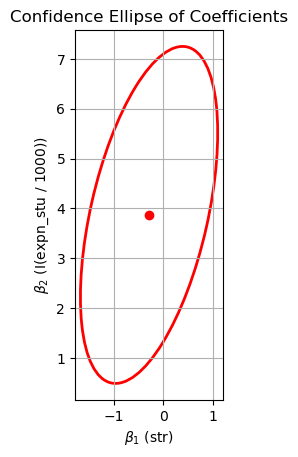

In [23]:
 plot_coefficient_confidence_ellipse(model3, 'str','I(expn_stu / 1000)')

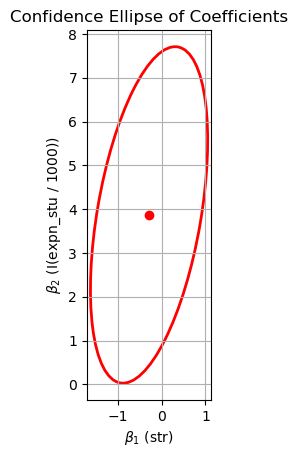

In [24]:
 plot_coefficient_confidence_ellipse(model2, 'str','I(expn_stu / 1000)')

## Model Specification for Multiple Regression

Refer to theory and experts to decide on base specification then compare it with alternative specifications 

## Analysis of the Test Score Data Set

In [25]:
df.columns

Index(['Observation Number', 'dist_cod', 'county', 'district', 'gr_span',
       'enrl_tot', 'teachers', 'calw_pct', 'meal_pct', 'computer', 'testscr',
       'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct', 'read_scr',
       'math_scr'],
      dtype='object')

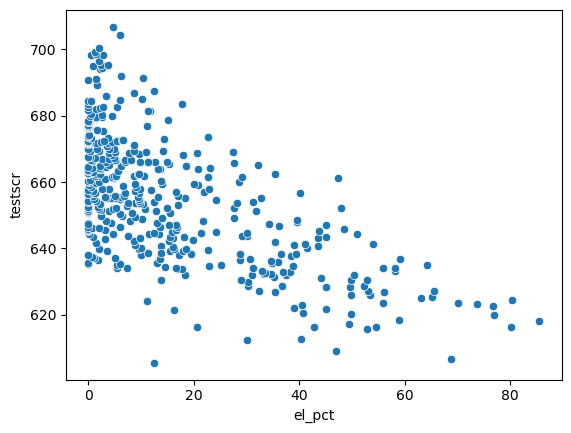

In [26]:
sns.scatterplot(x='el_pct', y='testscr', data=df);

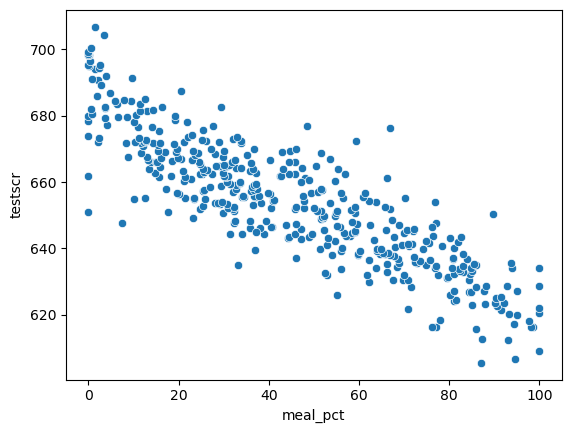

In [27]:
sns.scatterplot(x='meal_pct', y='testscr', data=df);

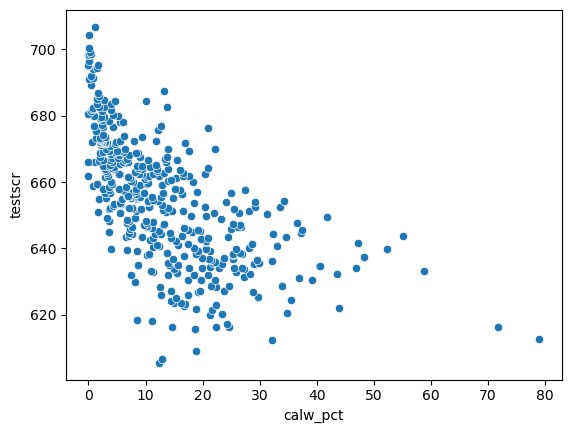

In [28]:
sns.scatterplot(x='calw_pct', y='testscr', data=df);

For base model, we use str, el_pct, meal_pct

In [29]:
model4 = smf.ols('testscr ~ str', data =df).fit(cov_type = 'HC2')
print(model4.summary())
print("*"*90)
print("Number of Observations (nobs):", model4.nobs)
print("Adjusted R-squared:", model4.rsquared_adj)
print("Standard Error of Regression (SER):", math.sqrt(model4.ssr / model4.df_resid))
print("*"*90)
print("Coefficient of 'str':", model4.params['str'])
print("Standard Error of 'str' coefficient:", model4.bse['str'])
print("Confidence Interval of 'str' coefficient:", model4.conf_int().loc['str'])
print("*"*90)
print("Coefficient of intercept:", model4.params['Intercept'])
print("Standard Error of 'intercept' coefficient:", model4.bse['Intercept'])
print("Control Variables:")

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.13
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.55e-05
Time:                        14:57:52   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.400     67.206      0.0

In [30]:
model5 = smf.ols('testscr ~ str + el_pct', data =df).fit(cov_type = 'HC2')
print(model5.summary())
print("*"*90)
print("Number of Observations (nobs):", model5.nobs)
print("Adjusted R-squared:", model5.rsquared_adj)
print("Standard Error of Regression (SER):", math.sqrt(model5.ssr / model5.df_resid))
print("*"*90)
print("Coefficient of 'str':", model5.params['str'])
print("Standard Error of 'str' coefficient:", model5.bse['str'])
print("Confidence Interval of 'str' coefficient:", model5.conf_int().loc['str'])
print("*"*90)
print("Coefficient of intercept:", model5.params['Intercept'])
print("Standard Error of 'intercept' coefficient:", model5.bse['Intercept'])
print("*"*90)
print("Control Variables:")
print("Coefficient of 'el_pct':", model5.params['el_pct'])
print("Standard Error of 'el_pct' coefficient:", model5.bse['el_pct'])


                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     222.8
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.56e-66
Time:                        14:57:52   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      8.754     78.365      0.0

In [31]:
model6 = smf.ols('testscr ~ str + el_pct + meal_pct', data =df).fit(cov_type = 'HC2')
print(model6.summary())
print("*"*90)
print("Number of Observations (nobs):", model6.nobs)
print("Adjusted R-squared:", model6.rsquared_adj)
print("Standard Error of Regression (SER):", math.sqrt(model6.ssr / model6.df_resid))
print("*"*90)
print("Coefficient of 'str':", model6.params['str'])
print("Standard Error of 'str' coefficient:", model6.bse['str'])
print("Confidence Interval of 'str' coefficient:", model6.conf_int().loc['str'])
print("*"*90)
print("Coefficient of intercept:", model6.params['Intercept'])
print("Standard Error of 'intercept' coefficient:", model6.bse['Intercept'])
print("*"*90)
print("Control Variables:")
print("Coefficient of 'el_pct':", model6.params['el_pct'])
print("Standard Error of 'el_pct' coefficient:", model6.bse['el_pct'])
print("Coefficient of 'meal_pct':", model6.params['meal_pct'])
print("Standard Error of 'meal_pct' coefficient:", model6.bse['meal_pct'])

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     451.5
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          2.13e-130
Time:                        14:57:52   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      5.591    125.225      0.0

In [32]:
model7 = smf.ols('testscr ~ str + el_pct + meal_pct + calw_pct', data =df).fit(cov_type = 'HC2')
print(model7.summary())
print("*"*90)
print(f"Number of Observations (nobs): {model7.nobs}")
print(f"Adjusted R-squared: {model7.rsquared_adj}")
print(f"Standard Error of Regression (SER): {math.sqrt(model7.ssr / model7.df_resid)}")
print("*"*90)
print(f"Coefficient of 'str': {model7.params['str']}")
print(f"Standard Error of 'str' coefficient: {model7.bse['str']}")
print(f"Confidence Interval of 'str' coefficient: {model7.conf_int().loc['str']}")
print("*"*90)
print(f"Coefficient of intercept: {model7.params['Intercept']}")
print(f"Standard Error of 'intercept' coefficient: {model7.bse['Intercept']}")
print("*"*90)
print("Control Variables:")
print(f"Coefficient of 'el_pct': {model7.params['el_pct']}")
print(f"Standard Error of 'el_pct' coefficient: {model7.bse['el_pct']}")
print(f"Coefficient of 'meal_pct': {model7.params['meal_pct']}")
print(f"Standard Error of 'meal_pct' coefficient: {model7.bse['meal_pct']}")
print(f"Coefficient of 'calw_pct': {model7.params['calw_pct']}")
print(f"Standard Error of 'calw_pct' coefficient: {model7.bse['calw_pct']}")

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     357.7
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          5.15e-133
Time:                        14:57:52   Log-Likelihood:                -1520.2
No. Observations:                 420   AIC:                             3050.
Df Residuals:                     415   BIC:                             3071.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.3918      5.559    125.982      0.0

In [33]:
model8 = smf.ols('testscr ~ str + el_pct  + calw_pct', data =df).fit(cov_type = 'HC2')
print(model8.summary())
print("*"*90)
print(f"Number of Observations (nobs): {model8.nobs}")
print(f"Adjusted R-squared: {model8.rsquared_adj}")
print(f"Standard Error of Regression (SER): {math.sqrt(model8.ssr / model8.df_resid)}")
print("*"*90)
print(f"Coefficient of 'str': {model8.params['str']}")
print(f"Standard Error of 'str' coefficient: {model8.bse['str']}")
print(f"Confidence Interval of 'str' coefficient: {model8.conf_int().loc['str']}")
print("*"*90)
print(f"Coefficient of intercept: {model8.params['Intercept']}")
print(f"Standard Error of 'intercept' coefficient: {model8.bse['Intercept']}")
print("*"*90)
print("Control Variables:")
print(f"Coefficient of 'el_pct': {model8.params['el_pct']}")
print(f"Standard Error of 'el_pct' coefficient: {model8.bse['el_pct']}")
print(f"Coefficient of 'calw_pct': {model8.params['calw_pct']}")
print(f"Standard Error of 'calw_pct' coefficient: {model8.bse['calw_pct']}")

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     167.2
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.09e-71
Time:                        14:57:52   Log-Likelihood:                -1625.3
No. Observations:                 420   AIC:                             3259.
Df Residuals:                     416   BIC:                             3275.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    697.9987      6.946    100.491      0.0

### Interpretation

In contrast to the other two control variables, the percentage qualifying for
income assistance appears to be redundant.

R squared ajusted increases when adding student characteristics

Controlling for these student characteristics cuts the estimated effect of the
student–teacher ratio on test scores approximately in half. This estimated
effect is not very sensitive to which specific control variables are included in
the regression. In all cases, the hypothesis that the coefficient on the student–
teacher ratio is 0 can be rejected at the 5% level

## Exercises

🚧 Under Construction